# Code Review Project 1.2

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import re

In [24]:
path = '../code_review3/data'

## Example 1: Compact code

In [25]:
df = pd.concat([
    pd.read_csv(os.path.join(path, fn), sep=',', names=['name', 'gender', 'count']).assign(
        year=re.search('(?<=yob)(.*)(?=.txt)', fn).group(0)) for fn in os.listdir(path)
])
df.shape

(2052781, 4)

In [26]:
df.head(3)

,name,gender,count,year
0,Mary,F,63175,1955
1,Deborah,F,52320,1955
2,Linda,F,51302,1955


## Example 2: Plotting names

name
Arielle    AxesSubplot(0.125,0.125;0.775x0.755)
Frida      AxesSubplot(0.125,0.125;0.775x0.755)
Leia       AxesSubplot(0.125,0.125;0.775x0.755)
Name: count, dtype: object

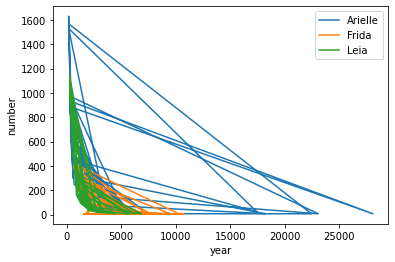

In [27]:
celebrities = ['Arielle', 'Frida', 'Leia']

df_names = df[df['name'].isin(celebrities)]

df_names.groupby('name')['count'].plot(xlabel='year', ylabel='number', legend=['Arielle', 'Frida', 'Leia'])

## Example 3: Normalization

<ipython-input-28-db9152b72cbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_df['percentage'] = (name_df['count'] / name_df['total_births']) * 100
<ipython-input-28-db9152b72cbb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_df.sort_values(by=['year'], inplace=True)


Text(0, 0.5, '% Saras per year')

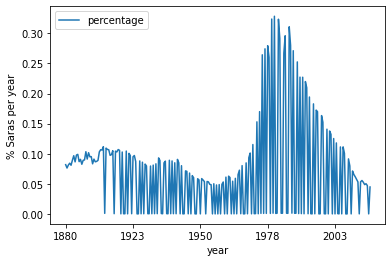

In [28]:
df['total_births'] = df.groupby('year')['count'].transform(sum)

name_df = df.loc[df['name'] == 'Sara']
name_df['percentage'] = (name_df['count'] / name_df['total_births']) * 100

name_df.sort_values(by=['year'], inplace=True)
name_df.plot.line(x='year', y='percentage')
plt.ylabel('% Saras per year')